<a href="https://colab.research.google.com/github/sandeepss2020/Computer_Vision/blob/main/CV_LAB2_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


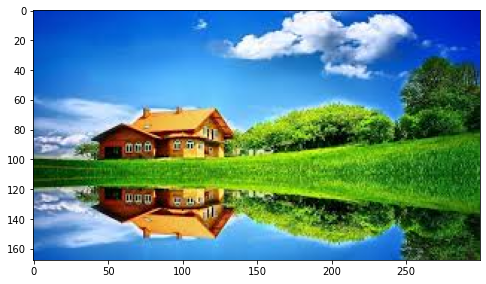

In [19]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computer_Vision_dr/home.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, figsize=(8,8))
plt.imshow(image)

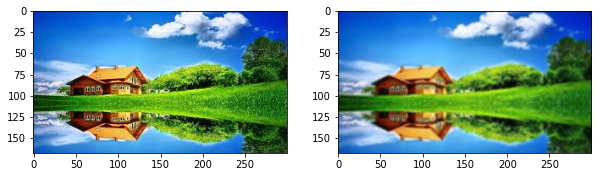

In [6]:
#Box Blur

abc=np.ones((3,3))
kernel = np.ones((3, 3), np.float32) / 9
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(image)
ax[1].imshow(img)

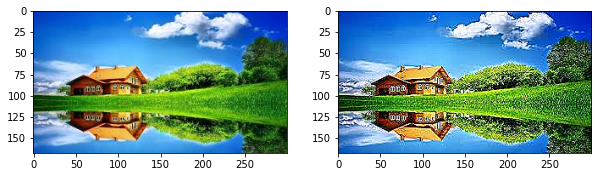

In [7]:
# Sharpening

kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(image)
ax[1].imshow(img)

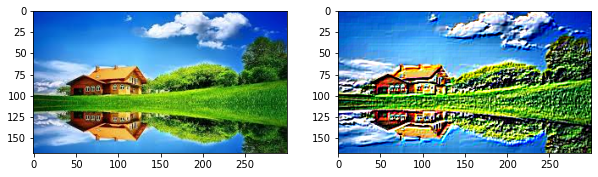

In [8]:
#Emboss

kernel = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(image)
ax[1].imshow(img)

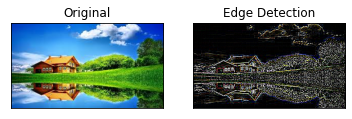

In [20]:
edge_kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

dst = cv2.filter2D(image, -1, edge_kernel)

plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(dst)
plt.title('Edge Detection')
plt.xticks([])
plt.yticks([])

plt.show()

In [13]:
noisy_img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Computer_Vision_dr/n_image.jpg", 0)

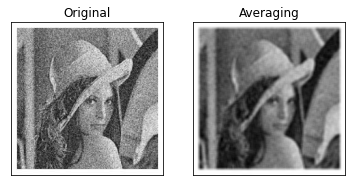

In [14]:
kernel = np.ones((5,5), np.float32) / 25
dst = cv2.filter2D(noisy_img,-1,kernel)

plt.subplot(121)
plt.imshow(noisy_img, cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(dst, cmap='gray')
plt.title('Averaging')
plt.xticks([])
plt.yticks([])

plt.show()

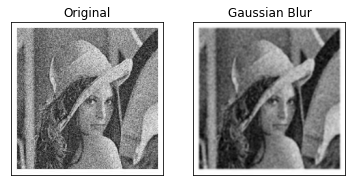

In [15]:
gau_blur = cv2.GaussianBlur(noisy_img, (5,5), 0)

plt.subplot(121)
plt.imshow(noisy_img, cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(gau_blur, cmap='gray')
plt.title('Gaussian Blur')
plt.xticks([])
plt.yticks([])
plt.show()

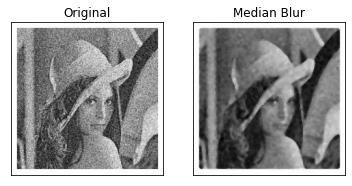

In [16]:
median_blur = cv2.medianBlur(noisy_img, 5)

plt.subplot(121)
plt.imshow(noisy_img, cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(median_blur, cmap='gray')
plt.title('Median Blur')
plt.xticks([])
plt.yticks([])
plt.show()

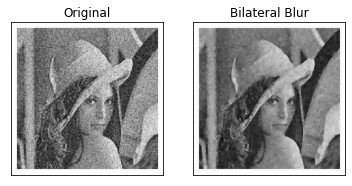

In [17]:
bilateral_blur = cv2.bilateralFilter(noisy_img, 7, 30, 30)

plt.subplot(121)
plt.imshow(noisy_img, cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(bilateral_blur, cmap='gray')
plt.title('Bilateral Blur')
plt.xticks([])
plt.yticks([])
plt.show()

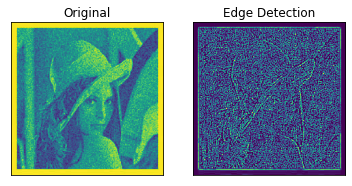

In [18]:
edge_kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

dst = cv2.filter2D(noisy_img, -1, edge_kernel)

plt.subplot(121)
plt.imshow(noisy_img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(dst)
plt.title('Edge Detection')
plt.xticks([])
plt.yticks([])

plt.show()

# ***Correlation***

In [9]:
# read image
src = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computer_Vision_dr/home.jpg')
# prepare averaging filter
kernel = np.ones((3, 3), dtype=np.float32)
kernel /= 9
# apply kernel to the original image
dst = cv2.filter2D(src, -1, kernel)
# concatenate images horizontally
result = np.concatenate((src, dst), axis=1)
cv2.imwrite('output.png', result)

True

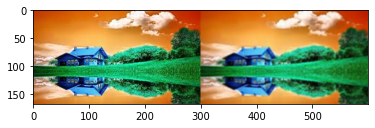

In [10]:
image = cv2.imread('output.png')
plt.imshow(image)

In [11]:
# read image
src = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computer_Vision_dr/home.jpg')
# prepare the filter
kernel = [[0,0,0], [0,1,0], [0,0,0]]
# apply kernel to the original image
dst = cv2.filter2D(src, -1, np.array(kernel))
# concatenate images horizontally
result = np.concatenate((src, dst), axis=1)
cv2.imwrite('result.png', result)

True

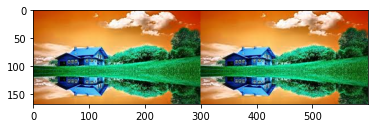

In [12]:
image3 = cv2.imread('result.png')
plt.imshow(image3)

In [42]:
corr_img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computer_Vision_dr/scene2.jpg', 0)
corr_img2 = img.copy()
template = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computer_Vision_dr/coco2.jpg', 0)

w, h = template.shape[::-1]

error: ignored

In [40]:
print(w, h)
print(template.shape)

219 230
(230, 219)


In [30]:
methods = ['cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED']

In [31]:
plt.rcParams['figure.figsize'] = (20, 20)

In [41]:
for meth in methods:
    corr_img1 = corr_img2.copy()
    corr_img1 = cv2.cvtColor(corr_img1, cv2.COLOR_BGR2GRAY)
    method = eval(meth)
    res = cv2.matchTemplate(corr_img1, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(corr_img1,top_left, bottom_right, 255, 2)
    plt.subplot(121)
    plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122)
    plt.imshow(corr_img1,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

error: ignored

Differentiate the above two methods and interpret your result

**Correlation** is an exact similarity measure between two functions K (the kernel, filter, or template) and S (the signal under test). It answers the questions, "(1) Where in the signal S are these two functions most similar, and (2) How similar are they at that point?" The similarity measure is computed at point t as the dot product of a copy of the kernel function translated by t with the signal under test.
How two features are similar?

**Convolution** is identical to correlation except that the kernel is flipped before correlation. Convolution is only a measure of similarity between two signals if the kernel is symmetric, making the problem equivalent to correlation. How one signal is varying depend on other. We rotate the mask to reduce the noise or to detect the edges from upper left corner to bottom right corner.

The Basic difference between Correlation and convolution is :-

Correlation is measurement of the similarity between two signals/sequences.

Convolution is measurement of effect of one signal on the other signal.

Write the Different applications of convolution and correlation

*convolution is used to compute the probability density function of a sum of two independent random variables (based on their probability density functions)

*convolution is used to find the common area between the two signals.

*correlation is used to find the comparison of two signals

*correlation is used to appreciate the stationarity of a random signal.

*Correlation is used as well in GPS systems for satellites' detection